In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('test_fresh.xls')

In [3]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [4]:
target = pd.read_csv('kaggle1.csv')

In [5]:
target.drop('Product_Supermarket_Identifier',axis = 1 ,inplace = True)

In [6]:
target.head()

,Product_Supermarket_Sales
0,1469.9090
1,9260.5360
2,8655.6650
3,1328.2487
4,8439.3490


In [7]:
data  = pd.concat([target,data],axis = 1 )

In [8]:
data.head()

,Product_Supermarket_Sales,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,1469.9090,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,9260.5360,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,8655.6650,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,1328.2487,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,8439.3490,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 13 columns):
Product_Supermarket_Sales         3532 non-null float64
Product_Identifier                3532 non-null object
Supermarket_Identifier            3532 non-null object
Product_Supermarket_Identifier    3532 non-null object
Product_Weight                    2871 non-null float64
Product_Fat_Content               3532 non-null object
Product_Shelf_Visibility          3532 non-null float64
Product_Type                      3532 non-null object
Product_Price                     3532 non-null float64
Supermarket_Opening_Year          3532 non-null int64
Supermarket _Size                 2573 non-null object
Supermarket_Location_Type         3532 non-null object
Supermarket_Type                  3532 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 358.8+ KB


In [10]:
data.describe()

,Product_Supermarket_Sales,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year
count,3532.000000,2871.000000,3532.000000,3532.000000,3532.000000
mean,4831.366592,12.781665,0.065030,296.903392,2004.900057
std,2859.425538,4.554868,0.049454,181.897221,8.497250
min,-649.960800,4.555000,0.000000,78.230000,1992.000000
25%,2588.363100,8.840000,0.026811,145.307500,1994.000000
50%,4087.944000,12.600000,0.054444,237.770000,2006.000000
75%,7300.159275,16.600000,0.094049,461.002500,2011.000000
max,16351.418000,21.350000,0.321115,667.220000,2016.000000


In [11]:
data.isnull().sum()

Product_Supermarket_Sales           0
Product_Identifier                  0
Supermarket_Identifier              0
Product_Supermarket_Identifier      0
Product_Weight                    661
Product_Fat_Content                 0
Product_Shelf_Visibility            0
Product_Type                        0
Product_Price                       0
Supermarket_Opening_Year            0
Supermarket _Size                 959
Supermarket_Location_Type           0
Supermarket_Type                    0
dtype: int64

In [12]:
data['Product_Weight'].fillna(data.groupby('Product_Fat_Content')['Product_Weight'].transform('mean'), inplace = True)

In [13]:
test = pd.read_csv('gbefun.csv')

In [14]:
test.head()

,Unnamed: 0,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,8.270,0.214125,459.98,2005,1.0,0.270,0.98,0,1,0,0,0,1,1,0,0,0
1,1,8.270,0.127821,464.98,1994,2.0,0.270,0.98,0,1,0,0,0,1,0,1,0,0
2,2,7.390,0.082171,477.38,1994,2.0,0.390,0.38,1,0,0,0,0,1,0,1,0,0
3,3,6.115,0.011791,472.63,2005,1.0,0.115,0.63,0,1,0,0,0,1,1,0,0,0
4,4,6.115,0.007038,473.13,1994,2.0,0.115,0.13,0,1,0,0,0,1,0,1,0,0


In [15]:
train_test_split = [data]
supermarket_size = {'High': 2,'Medium': 1,'Small':0}
for dataset in train_test_split:
    dataset['Supermarket _Size'] =dataset['Supermarket _Size'].map(supermarket_size)

In [16]:
data.head()

,Product_Supermarket_Sales,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,1469.9090,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,9260.5360,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,2.0,Cluster 3,Supermarket Type1
2,8655.6650,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,2.0,Cluster 3,Supermarket Type1
3,1328.2487,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,8439.3490,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,2.0,Cluster 3,Supermarket Type1


In [17]:
data['Supermarket _Size'].fillna(data.groupby('Product_Type')['Supermarket _Size'].transform('median'), inplace = True)

In [18]:
data['f'] = data.Product_Weight.astype(str)

In [19]:
data['f'] = data['f'].apply(lambda x: x.split('.')[0])

In [20]:
data['f'] = data['f'].astype(float)

In [21]:
data.head()

,Product_Supermarket_Sales,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,f
0,1469.9090,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,1.0,Cluster 3,Grocery Store,8.0
1,9260.5360,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,2.0,Cluster 3,Supermarket Type1,8.0
2,8655.6650,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,2.0,Cluster 3,Supermarket Type1,7.0
3,1328.2487,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,1.0,Cluster 3,Grocery Store,6.0
4,8439.3490,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,2.0,Cluster 3,Supermarket Type1,6.0


In [22]:
data.drop(['Product_Supermarket_Sales','f'],axis =  1, inplace = True)

In [23]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,1.0,Cluster 3,Grocery Store
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,2.0,Cluster 3,Supermarket Type1
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,2.0,Cluster 3,Supermarket Type1
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,1.0,Cluster 3,Grocery Store
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,2.0,Cluster 3,Supermarket Type1


In [24]:
data =  pd.concat([data,target],axis =  1)

In [25]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,1.0,Cluster 3,Grocery Store,1469.9090
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,2.0,Cluster 3,Supermarket Type1,9260.5360
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,2.0,Cluster 3,Supermarket Type1,8655.6650
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,1.0,Cluster 3,Grocery Store,1328.2487
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,2.0,Cluster 3,Supermarket Type1,8439.3490


In [26]:
data['f'] = data.Product_Weight.astype(str)
data['f'] = data['f'].apply(lambda x: x.split('.')[0])
data['f'] = data['f'].astype(float)
data['b'] =  data['Product_Weight'] - data['f']

In [27]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,f,b
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,1.0,Cluster 3,Grocery Store,1469.9090,8.0,0.270
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,2.0,Cluster 3,Supermarket Type1,9260.5360,8.0,0.270
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,2.0,Cluster 3,Supermarket Type1,8655.6650,7.0,0.390
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,1.0,Cluster 3,Grocery Store,1328.2487,6.0,0.115
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,2.0,Cluster 3,Supermarket Type1,8439.3490,6.0,0.115


In [28]:
data.drop(['Product_Supermarket_Identifier','Product_Identifier','Supermarket_Identifier','f'], axis =1, inplace = True)

In [29]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,b
0,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,1.0,Cluster 3,Grocery Store,1469.9090,0.270
1,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,2.0,Cluster 3,Supermarket Type1,9260.5360,0.270
2,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,2.0,Cluster 3,Supermarket Type1,8655.6650,0.390
3,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,1.0,Cluster 3,Grocery Store,1328.2487,0.115
4,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,2.0,Cluster 3,Supermarket Type1,8439.3490,0.115


In [30]:
data['a'] = data['Product_Price'].astype(str)
data['f'] = data['a'].apply(lambda x: x.split('.')[0])
data['f'] = data['f'].astype(float)
data['d'] =  data['Product_Price'] - data['f']

In [31]:
data.drop(['a','f'],axis = 1, inplace = True)

In [32]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,b,d
0,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,1.0,Cluster 3,Grocery Store,1469.9090,0.270,0.98
1,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,2.0,Cluster 3,Supermarket Type1,9260.5360,0.270,0.98
2,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,2.0,Cluster 3,Supermarket Type1,8655.6650,0.390,0.38
3,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,1.0,Cluster 3,Grocery Store,1328.2487,0.115,0.63
4,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,2.0,Cluster 3,Supermarket Type1,8439.3490,0.115,0.13


In [33]:
dumm1 = pd.get_dummies(data['Product_Fat_Content'])
dumm2 = pd.get_dummies(data['Supermarket_Location_Type'])
dumm3 = pd.get_dummies(data['Supermarket_Type'])

In [34]:
data.drop(['Supermarket_Location_Type','Product_Fat_Content','Supermarket_Type','Product_Type'],axis = 1, inplace = True)

In [35]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d
0,8.270,0.214125,459.98,2005,1.0,1469.9090,0.270,0.98
1,8.270,0.127821,464.98,1994,2.0,9260.5360,0.270,0.98
2,7.390,0.082171,477.38,1994,2.0,8655.6650,0.390,0.38
3,6.115,0.011791,472.63,2005,1.0,1328.2487,0.115,0.63
4,6.115,0.007038,473.13,1994,2.0,8439.3490,0.115,0.13


In [36]:
data  = pd.concat([data,dumm1,dumm2,dumm3],axis = 1)

In [37]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,8.270,0.214125,459.98,2005,1.0,1469.9090,0.270,0.98,0,1,0,0,0,1,1,0,0,0
1,8.270,0.127821,464.98,1994,2.0,9260.5360,0.270,0.98,0,1,0,0,0,1,0,1,0,0
2,7.390,0.082171,477.38,1994,2.0,8655.6650,0.390,0.38,1,0,0,0,0,1,0,1,0,0
3,6.115,0.011791,472.63,2005,1.0,1328.2487,0.115,0.63,0,1,0,0,0,1,1,0,0,0
4,6.115,0.007038,473.13,1994,2.0,8439.3490,0.115,0.13,0,1,0,0,0,1,0,1,0,0


In [38]:
data.to_csv('mr_copy.csv')

In [39]:
test.drop(['Unnamed: 0'],axis =  1 , inplace = True)

In [40]:
data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
count,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000
mean,12.781825,0.065030,296.903392,2004.900057,0.805776,4831.366592,0.529843,0.497390,0.611835,0.349094,0.039071,0.260193,0.340883,0.398924,0.101359,0.643545,0.121178,0.133918
std,4.106649,0.049454,181.897221,8.497250,0.589909,2859.425538,0.284891,0.289383,0.487402,0.476751,0.193792,0.438802,0.474073,0.489746,0.301846,0.479020,0.326380,0.340613
min,4.555000,0.000000,78.230000,1992.000000,0.000000,-649.960800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.395000,0.026811,145.307500,1994.000000,0.000000,2588.363100,0.300000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.847777,0.054444,237.770000,2006.000000,1.000000,4087.944000,0.600000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,15.750000,0.094049,461.002500,2011.000000,1.000000,7300.159275,0.800000,0.750000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.321115,667.220000,2016.000000,2.000000,16351.418000,0.985000,0.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
X = data.drop('Product_Supermarket_Sales',axis = 1)

In [42]:
y = data['Product_Supermarket_Sales']

In [43]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from xgboost import XGBRegressor

In [46]:
model = XGBRegressor()

In [47]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [48]:
pred1 = model.predict(X_test)

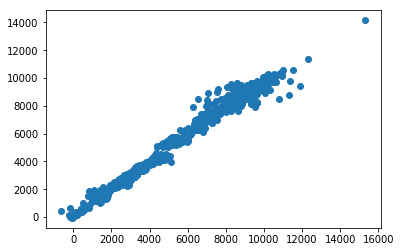

In [49]:
plt.scatter(y_test,pred1)

In [50]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(model,X_test,y_test,cv =10)

In [51]:
print(score.mean()*100)

97.27047722972998


In [52]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [53]:
params = {
        'gamma': [0.5,0.3, 1, 1.5, 2, 5],
        'learning_rate' :[0.1,0.2,0.001]
        }

In [54]:
grid = GridSearchCV( XGBRegressor() , params, verbose =  3  )

In [55]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.980960 -   0.1s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.974280 -   0.1s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.979785 -   0.1s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.986221 -   0.1s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.978374 -   0.1s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.985590 -   0.1s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.154718 -   0.1s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.157897 -   0.1s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   11.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.5, 0.3, 1, 1.5, 2, 5], 'learning_rate': [0.1, 0.2, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [56]:
grid_predictions = grid.predict(X_test)

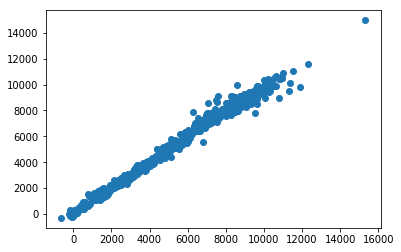

In [57]:
plt.scatter(y_test,grid_predictions)

In [58]:
mypred2 = grid.predict(test)

In [59]:
dat11  =pd.read_csv('submission_price.xls')
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)
a = pd.DataFrame({'Product_Supermarket_Sales':mypred2})

In [60]:
submitted1 = pd.concat([dat11,a],axis =1)

In [61]:
submitted1.to_csv('kaggled1.csv',index = False)

In [62]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(grid,X_test,y_test,cv =10)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.965698 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.964068 -   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.971812 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.967642 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.968374 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.970554 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.243449 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.216786 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.208588 -   0.0s
[CV] g

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    5.1s finished


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.981732 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.964208 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.978097 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.2, score=0.985096 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.968103 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.981703 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.308080 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.216315 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.211272 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] ........... gamma=0.3, learning_rate=0.1, score=0.981732 -   0.1s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    6.2s finished


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.963431 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.966025 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.973528 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.966545 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.968565 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.977130 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.116718 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.222090 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.210198 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    5.0s finished


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.965380 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.964438 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.974785 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.2, score=0.968216 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.969952 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.980824 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.190536 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.216016 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.210038 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] ........... gamma=0.3, learning_rate=0.1, score=0.965380 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.968329 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.965695 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.977661 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.964401 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.970968 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.981505 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.186663 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.196307 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.207483 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    4.8s finished


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.962261 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.971622 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.972979 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.967133 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.977087 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.977077 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.192860 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.322816 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.213593 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.962722 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.970452 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.973430 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.966209 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.975196 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.978033 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.193721 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.178355 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.213064 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    5.0s finished


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.962709 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.974370 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.971589 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.966454 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.979830 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.977008 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.187193 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.180633 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.323944 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    4.9s finished


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.964515 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.971520 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.968468 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.963792 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.977405 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.972765 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.191320 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.186145 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.284311 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    5.0s finished


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.965023 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.970522 -   0.0s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.969948 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.967217 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.971946 -   0.0s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.974826 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.192501 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.180797 -   0.0s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-2.213185 -   0.0s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    4.8s finished


In [63]:
print(score.mean()*100)

97.7852645432472


In [64]:
from sklearn import metrics 

In [65]:
print(np.sqrt(metrics.mean_squared_error(y_test,grid_predictions)))

280.371115585859


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [68]:
# Fit regression model
rng = np.random.RandomState(1)

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

In [69]:
regr_1.fit(X_train,y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x000002C3B6E7C7E0>)

In [70]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

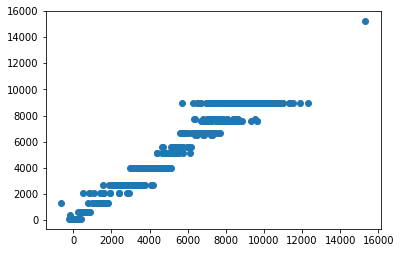

In [71]:
plt.scatter(y_test,y_1)

In [72]:
predictions = regr_1.predict(test)

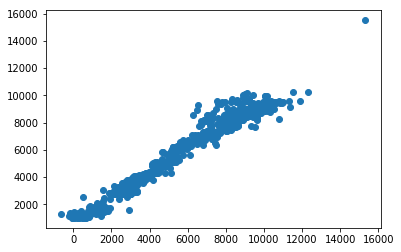

In [73]:
plt.scatter(y_test,y_2)

In [74]:
b = pd.DataFrame({'Product_Supermarket_Sales':predictions})

In [75]:
submitted2 = pd.concat([dat11,b],axis =1)

In [76]:
submitted2.to_csv('sunday.csv',index = False)

In [77]:
submitted1.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,DRA59_CHUKWUDI010,1467.031738
1,DRA59_CHUKWUDI013,9107.410156
2,DRB01_CHUKWUDI013,8542.250977
3,DRB13_CHUKWUDI010,1485.219360
4,DRB13_CHUKWUDI013,8646.852539
